In [1]:
# This ensures to use the source code if not installed as Python package
try:
    import rapidAligner
except:
    import os, sys
    sys.path.append(os.path.join(os.getcwd(),".."))

In [2]:
import rapidAligner as ra
import cupy as cp
import numpy as np
import pylab as pl

In [3]:
url = "https://www.cs.ucr.edu/~eamonn/ECG_one_day.zip"
with ra.util.Timer("load data"):
    query, subject = ra.util.ECGLoader(url=url).data
print(len(query), len(subject))

elapsed time: 649 ms (load data)
421 20140000


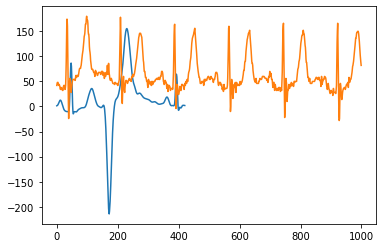

In [4]:
pl.plot(query)
pl.plot(subject[:1000])

elapsed time: 1028 ms (align sdist fft)
elapsed time: 417 ms (align sdist naive)
elapsed time: 49 ms (align sdist fft)
elapsed time: 101 ms (align sdist naive)
elapsed time: 48 ms (align sdist fft)
elapsed time: 105 ms (align sdist naive)
elapsed time: 50 ms (align sdist fft)
elapsed time: 107 ms (align sdist naive)
elapsed time: 48 ms (align sdist fft)
elapsed time: 108 ms (align sdist naive)


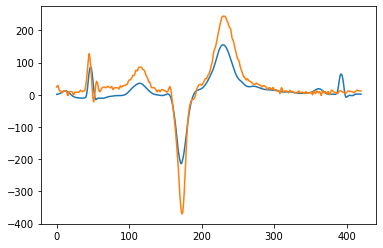

In [5]:
num_repeats = 5 # just to eliminate initial jit compiler overhead on first call
for _ in range(num_repeats):
    with ra.util.Timer("align sdist fft"):
        ying = ra.ED.sdist(query, subject, mode="fft")
    with ra.util.Timer("align sdist naive"):
        yang = ra.ED.sdist(query, subject, mode="naive")
        
assert(cp.allclose(ying, yang))

k = int(cp.argmin(yang))
pl.plot(query)
pl.plot(subject[k:k+len(query)])

In [6]:
query_gpu, subject_gpu = cp.asarray(query), cp.asarray(subject)

for _ in range(num_repeats):
    with ra.util.Timer("align sdist fft"):
        ying = ra.ED.sdist(query_gpu, subject_gpu, mode="fft")
    with ra.util.Timer("align sdist naive"):
        yang = ra.ED.sdist(query_gpu, subject_gpu, mode="naive")
        
assert(cp.allclose(ying, yang))

elapsed time: 18 ms (align sdist fft)
elapsed time: 88 ms (align sdist naive)
elapsed time: 22 ms (align sdist fft)
elapsed time: 86 ms (align sdist naive)
elapsed time: 22 ms (align sdist fft)
elapsed time: 89 ms (align sdist naive)
elapsed time: 22 ms (align sdist fft)
elapsed time: 87 ms (align sdist naive)
elapsed time: 22 ms (align sdist fft)
elapsed time: 85 ms (align sdist naive)


elapsed time: 199 ms (align mdist fft)
elapsed time: 384 ms (align mdist naive)
elapsed time: 28 ms (align mdist fft)
elapsed time: 111 ms (align mdist naive)
elapsed time: 23 ms (align mdist fft)
elapsed time: 99 ms (align mdist naive)
elapsed time: 28 ms (align mdist fft)
elapsed time: 119 ms (align mdist naive)
elapsed time: 29 ms (align mdist fft)
elapsed time: 102 ms (align mdist naive)


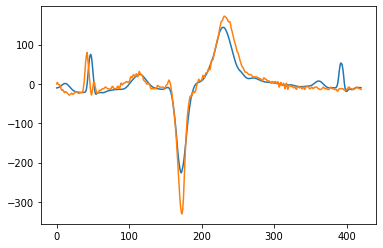

In [7]:
for _ in range(num_repeats):
    with ra.util.Timer("align mdist fft"):
        ying = ra.ED.mdist(query_gpu, subject_gpu, mode="fft")
    with ra.util.Timer("align mdist naive"):
        yang = ra.ED.mdist(query_gpu, subject_gpu, mode="naive")
assert(cp.allclose(ying, yang))

k = int(cp.argmin(yang))
mnorm = lambda x : x-np.mean(x)
pl.plot(mnorm(query))
pl.plot(mnorm(subject[k:k+len(query)]))

elapsed time: 635 ms (align zdist fft)
elapsed time: 396 ms (align zdist naive)
elapsed time: 27 ms (align zdist fft)
elapsed time: 121 ms (align zdist naive)
elapsed time: 27 ms (align zdist fft)
elapsed time: 137 ms (align zdist naive)
elapsed time: 33 ms (align zdist fft)
elapsed time: 141 ms (align zdist naive)
elapsed time: 33 ms (align zdist fft)
elapsed time: 142 ms (align zdist naive)


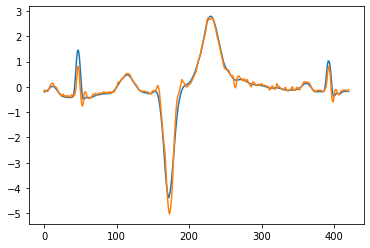

In [8]:
for _ in range(num_repeats):
    with ra.util.Timer("align zdist fft"):
        ying = ra.ED.zdist(query_gpu, subject_gpu, mode="fft")
    with ra.util.Timer("align zdist naive"):
        yang = ra.ED.zdist(query_gpu, subject_gpu, mode="naive")

assert(cp.allclose(ying, yang))
        
k = int(cp.argmin(yang))
znorm = lambda x : (x-np.mean(x))/np.std(x, ddof=0)
pl.plot(znorm(query))
pl.plot(znorm(subject[k:k+len(query)]))